In [22]:
#!/usr/bin/python
#import wradlib as wrl
import pylab as pl
from glob import glob
import warnings
warnings.filterwarnings('ignore')
try:
    get_ipython().magic("matplotlib inline")
except:
    pl.ion()
import numpy as np

import csv
import os
import datetime
import pandas as pd

#shapefile: GIS vector data format (ESRI)
import shapefile as shp  # Requires the pyshp package
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib import ticker
import netCDF4 as nc4
from datetime import date,timedelta
import plotly.graph_objs as go
import matplotlib.lines as mlines
import seaborn as sns

import importlib

#import external functions (need pip install ipynb)
import ipynb.fs.full.HaileventsFunctions as HF

In [2]:
#Folder address containing data:
fold = '/home/ciccuz/phd/KIT/hail_data/' #'/run/media/ciccuz/Seagate/phd_archive/KIT_backup_31Jan22/'
plt_fold = '/home/ciccuz/phd/KIT/jupyter-notebooks/plots/'

### - Selection of hailstorm of interest:

In [3]:
#Select day, hours, lat, lon for the event:

"""
28-29 June 2006 (SW Germany - Austria)
"""
#day=2006179; year_u=2006; mon_u=6; day_u=28; hhmin=1; hhmax=24; lonmin=7; lonmax=17;latmin=44; latmax=49;
#day=2006180; year_u=2006; mon_u=6; day_u=29; hhmin=1; hhmax=22; lonmin=12; lonmax=19;latmin=44; latmax=49;

"""
23 July 2009 (Austria)
"""
#day=2009204; year_u=2009; mon_u=7; day_u=23; hhmin=8; hhmax=23; lonmin=8; lonmax=15;latmin=46.5; latmax=49; 

"""
28 July 2013 (Swabian Jura)
"""
#day=2013209; year_u=2013; mon_u=7; day_u=28; hhmin=8; hhmax=23; lonmin=7.5; lonmax=11;latmin=47.5; latmax=50; 

"""
6 August 2013 (Swabian Jura)
"""
#day=2013218; year_u=2013; mon_u=8; day_u=6; hhmin=10; hhmax=19; lonmin=7.5; lonmax=12;latmin=46; latmax=50; 

"""
5 September 2015 (Napoli - Campania)
"""
#day=2015248; year_u=2015; mon_u=9; day_u=5; hhmin=1; hhmax=23; lonmin=12; lonmax=16;latmin=40; latmax=42; 
#hhmin=7; hhmax=13





"""
24 June 2016 (Dettingen - S Germany)
"""
#day=2016176; year_u=2016; mon_u=6; day_u=24; hhmin=14; hhmax=23; lonmin=7; lonmax=11.5;latmin=46; latmax=50;

"""
29 July 2017 (Pontenure - Piacenza - Emilia Romagna)
"""
#day=2017210; year_u=2017; mon_u=7; day_u=29; hhmin=16; hhmax=22; lonmin=7; lonmax=12;latmin=44; latmax=47; 
#hhmin=21; hhmax=22
"""
18 August 2017 (Bohringer - South Germany)
"""
#day=2017230; year_u=2017; mon_u=8; day_u=18; hhmin=8; hhmax=23; lonmin=7; lonmax=11.5;latmin=46; latmax=50;

"""
4 June 2018 (Noceto - Parma - Emilia Romagna)
"""
#day=2018155; year_u=2018; mon_u=6; day_u=4; hhmin=11; hhmax=21; lonmin=9.5; lonmax=12;latmin=44.25; latmax=46
#hhmin=9; hhmax=16;

"""
29 October 2018 (Sardinia)
"""
#day=2018302; year_u=2018; mon_u=10; day_u=29; hhmin=5; hhmax=22; lonmin=7; lonmax=11;latmin=38; latmax=42
#hhmin=13; hhmax=14





"""
10 July 2019 (Pescara - Abruzzo)
"""
#day=2019191; year_u=2019; mon_u=7; day_u=10; hhmin=8; hhmax=23; lonmin=13.5; lonmax=19;latmin=39; latmax=44;
#hhmin=10; hhmax=11

'\n10 July 2019 (Pescara - Abruzzo)\n'

#### - New hailstorms set for 2016-2018 over Italy:

In [53]:
"""
14 May 2017 (Nord-est Italy)
"""
day=2017134; year_u=2017; mon_u=5; day_u=14; hhmin=1; hhmax=23; lonmin=8.5; lonmax=13.5; latmin=44; latmax=47
fold_out = 'Veneto_'+"{:02d}".format(day_u)+'-'+"{:02d}".format(mon_u)+'-'+str(year_u)


"""
25 June 2017 (Nord-est Italy)
"""
#day=2017176; year_u=2017; mon_u=6; day_u=25; hhmin=1; hhmax=23; lonmin=7.5; lonmax=13.5; latmin=44; latmax=47.5
#fold_out = 'NordEstIT_'+"{:02d}".format(day_u)+'-'+"{:02d}".format(mon_u)+'-'+str(year_u)

"""
27 June 2017 (Asti)
"""
#day=2017178; year_u=2017; mon_u=6; day_u=27; hhmin=1; hhmax=23; lonmin=6.5; lonmax=11; latmin=44; latmax=46.5
#fold_out = 'Asti_'+"{:02d}".format(day_u)+'-'+"{:02d}".format(mon_u)+'-'+str(year_u)

"""
28 June 2017 (Nord Italy)
"""
#day=2017179; year_u=2017; mon_u=6; day_u=28; hhmin=1; hhmax=23; lonmin=8; lonmax=13; latmin=43.5; latmax=47.5
#fold_out = 'NordIT_'+"{:02d}".format(day_u)+'-'+"{:02d}".format(mon_u)+'-'+str(year_u)

"""
9-10 August 2017 (Trentino Sudtirol)
"""
#day=2017221; year_u=2017; mon_u=8; day_u=9; hhmin=1; hhmax=23; lonmin=8; lonmax=13; latmin=44.5; latmax=48.5
#day=2017222; year_u=2017; mon_u=8; day_u=10; hhmin=1; hhmax=23; lonmin=8; lonmax=13; latmin=44.5; latmax=48.5

#fold_out = 'Trentino_'+"{:02d}".format(day_u)+'-'+"{:02d}".format(mon_u)+'-'+str(year_u)

"""
23 July 2018 (Turi - Bari)
"""
#day=2018204; year_u=2018; mon_u=7; day_u=23; hhmin=7; hhmax=17; lonmin=14; lonmax=19; latmin=39; latmax=43
#fold_out = 'Bari_'+"{:02d}".format(day_u)+'-'+"{:02d}".format(mon_u)+'-'+str(year_u)

"""
2 September 2018 (Pescara)
"""
#day=2018245; year_u=2018; mon_u=9; day_u=2; hhmin=9; hhmax=20; lonmin=12; lonmax=16; latmin=41; latmax=45
#fold_out = 'Pescara_'+"{:02d}".format(day_u)+'-'+"{:02d}".format(mon_u)+'-'+str(year_u)

"""
7 September 2018 (Carapelle/Orta Nova - Foggia)
"""
#day=2018250; year_u=2018; mon_u=9; day_u=7; hhmin=9; hhmax=20; lonmin=14; lonmax=19; latmin=39; latmax=43
#fold_out = 'Foggia_'+"{:02d}".format(day_u)+'-'+"{:02d}".format(mon_u)+'-'+str(year_u)

"""
7 October 2018 (Melpignano - Lecce)
"""
#day=2018280; year_u=2018; mon_u=10; day_u=7; hhmin=1; hhmax=23; lonmin=14; lonmax=19; latmin=38; latmax=43
#fold_out = 'Lecce_'+str(day_u)+'-'+str(mon_u)+'-'+str(year_u)


'\n7 October 2018 (Melpignano - Lecce)\n'

In [54]:
fold_out

'Veneto_14-05-2017'

### - Initialization parameters

In [55]:
# must run the bash command: sshfs -p22 giordano@imk-tss-risk:/hail4/punge/ ./hail4_punge/

#Read the shapefiles:
sf_it = shp.Reader(fold + "hail4_punge/geodata/ITA_adm/ITA_adm0.shp", encoding='latin-1'); srn=5;
sf_de = shp.Reader(fold + "hail4_punge/geodata/DEU_adm/DEU_adm0.shp", encoding='latin-1'); srn=5;
sf_aut = shp.Reader(fold + "hail4_punge/geodata/AUT_adm/AUT_adm0.shp", encoding='latin-1'); srn=5;


#lat/lon coords to cover the whole SPHERA domain:
#lonmin=6; lonmax=19; latmin=35; latmax=49

pmin=200000

dstr=str(day);latplot=[latmin,latmax]; lonplot=[lonmin,lonmax]; dxstr=.1
ds=str(day);

#maps limits
x_lim=lonplot
y_lim=latplot

In [56]:
#Read and store cities and their features to be used in the maps:
clonsel, clatsel, csizesel, cnamesel, ckindsel = HF.HF_cities(latmin,latmax,lonmin,lonmax)

### - Read datasets:
- ESWD hail report
- UNIPOL insurance claims
- EUCLID punctual lightning data
- LAMPINET gridded (10km) lightning data/ LJ index
- OT data

In [38]:
#Read ESWD hail report data: store lat, lon, hail size and datetime, and retain only data in the selected area/time
if (year_u >= 1995) & (year_u <= 2020):

    #df_eswd = pd.read_csv('/home/bg2896/hail4_giordani/hail_obs/Insurance_ESSL_Italy_data/original_ungridded_data/ESSL/9313218694_v1_6_Giordani_LargeHail_Italy_1995-01-01_2020-12-31_data.csv')
    df_eswd = pd.read_csv(fold + 'hail4_punge/ESWD/ESWD_HAIL_19790101-20200531_v1_6.csv')   #Swabian Jura 2013
    eswd_ev_sel = HF.HF_eswd_df(df_eswd,year_u,mon_u,day_u,hhmin,hhmax,latmin,latmax,lonmin,lonmax)

else:
    eswd_ev_sel = pd.DataFrame()

eswd_ev_sel

,datetime,lat,lon,size,QC_level
0,2017-05-14 16:00:00,45.955,12.502,NaN,QC1
1,2017-05-14 19:00:00,44.917,11.917,NaN,QC1
2,2017-05-14 19:30:00,45.764,11.462,NaN,QC1
3,2017-05-14 19:30:00,45.749,11.458,NaN,QC1
4,2017-05-14 19:30:00,45.767,11.511,NaN,QC1
5,2017-05-14 19:30:00,45.775,11.450,NaN,QC1
6,2017-05-14 19:30:00,45.709,11.480,7.0,QC1
7,2017-05-14 19:30:00,45.693,11.427,5.0,QC1


In [39]:
#Read UNIPOL insurance claims for hail events:
if (year_u >= 2017) & (year_u <= 2020):
   
    df_unipol = pd.read_csv(fold + 'data/ESWD_insurance/Insurance_ESSL_Italy_data/original_ungridded_data/UNIPOL/Estrazione_SINISTRI_GRANDINE_E_VENTO_ITALIA_DateLatLon.csv')
    u_ev_sel = HF.HF_unipol_df(df_unipol,year_u,mon_u,day_u,hhmin,hhmax,latmin,latmax,lonmin,lonmax)

else:
    u_ev_sel = pd.DataFrame()

u_ev_sel

,datetime,lon,lat
0,2017-05-14 10:00:00,8.815098,45.826775
1,2017-05-14 21:00:00,11.474804,45.762646


In [40]:
#Read lightning EUCLID data (filtered (what means??): date,hour,lat,lon,intensity? measured how?)

#first access: read date and hour, create datetime column and order by datetime, then save new file csv
#df_lg = pd.read_csv('/home/bg2896/hail4_giordani/lightningss/BLIDS-Data_Filtered/BlidsData_2019_CG_10kA.csv', sep=';')
#df_lg.columns = ["date","hour","lon","lat","1","kA","NA"]

#df_lg['datetime'] = pd.to_datetime(df_lg['date'] + ' ' + df_lg['hour'])
#df_lg = df_lg.drop(['date', 'hour'], axis=1)
#df_lg = df_lg.sort_values(by='datetime').reset_index(drop=True)
#df_lg.to_csv(path_or_buf='/home/bg2896/hail4_giordani/events/lightning_BLIDS/BlidsData_2019_CG_10kA_ordered.csv',index=False)

#from second access:

#probably must run the bash command: 

#sshfs -p22 giordano@imk-tss-risk:/hail4/giordano/events/lightning_BLIDS/ ./hail4_giordani/events/lightning_BLIDS/

if (year_u >= 2001) & (year_u <= 2020):
    
    df_lg = pd.read_csv(fold + f'data/lightning_BLIDS/BlidsData_{year_u}_CG_10kA_ordered.csv')
    df_lg_sel = HF.HF_euclid_df(df_lg,year_u,mon_u,day_u,hhmin,hhmax,latmin,latmax,lonmin,lonmax)

else:
    df_lg_sel = pd.DataFrame()
    
df_lg_sel

,lon,lat,1,kA,NA,datetime
0,7.62411,47.45727,1,-8.1,NaN,2017-05-14 10:00:20.102
1,7.62279,47.43559,1,-8.1,NaN,2017-05-14 10:00:20.206
2,7.85605,47.40295,1,-11.6,NaN,2017-05-14 10:01:44.665
3,7.85295,47.41745,1,-9.2,NaN,2017-05-14 10:06:03.784
4,7.85418,47.34680,1,-16.5,NaN,2017-05-14 10:14:11.566
...,...,...,...,...,...,...
2546,12.07385,45.51215,1,-11.6,NaN,2017-05-14 22:59:12.738
2547,12.13579,45.38542,1,-2.8,NaN,2017-05-14 22:59:29.530
2548,11.46678,44.65508,1,-3.2,NaN,2017-05-14 22:59:41.147
2549,10.94000,45.44624,1,-6.4,NaN,2017-05-14 22:59:50.135


In [41]:
#Read LAMPINET shapefile:
sf_lamp_10 = shp.Reader(fold + "data/lampinet/mask/grid_10.shp", encoding='latin-1'); srn=5;

#parameter for the minimum number of lightning per day necessary to retain a LAMPINET box:
Nlig_min=5

#lampinet daily sum of lightnings in the 10km grid, by filtering out boxes with less than Nlig_min lightning/day
if (year_u >= 2016) & (year_u <= 2018):
    
    df_lamp_daysum_filt = HF.HF_Lampinet_raw(year_u, mon_u, day_u, Nlig_min)

else:
    df_lamp_daysum_filt = pd.DataFrame()
    
df_lamp_daysum_filt

,box_id,N_lightnings
0,9523,13
1,9524,56
2,9653,8
3,10341,9
4,10347,7
...,...,...
342,16669,6
343,16677,6
344,16805,6
345,16806,6


In [42]:
#Read LAMPINET LJ index

- Index =0 o 1: probably 1 when a certain threshold of number of lightnings in a certain time to define a LJ is exceeded, 0 otherwise (MUST ASK VALENTINA!!)

- Index must divided into different days to be used! Ask Valentina also about temporal resolution/"commitment" of the index??

- LJ index is hourly-based and <span style="color:red">ONLY ON GRID OF 20 KM!!!</span>

In [43]:
#Read LAMPINET LJ shapefile (20 km for now!):
sf_lamp_20 = shp.Reader(fold + "data/lampinet/mask/grid_5.shp", encoding='latin-1'); srn=5;

#Lampinet LJ index for specific hour of the day lj_hour

if (year_u >= 2015) & (year_u <= 2020):
    lj_hour=20

    df_lamp_sel = HF.HF_Lampinet_LJhourly(year_u, mon_u, day_u, lj_hour)
    df_lamp_sel

    #count number of cells where LJ index=1
    sum(1 for i in df_lamp_sel.index if df_lamp_sel.ind[i] == 1)
else:
    df_lamp_sel = pd.DataFrame()

In [44]:
"""
Read OT data
"""

#SETUP OT parameters:

#otpref='NASALARC_MET08_SEVIRI_OTDETECTION_'
#otpref='NASALARC_MET09_SEVIRI_OTDETECTION_'
otpref='NASALARC_MET10_SEVIRI_OTDETECTION_'
#otpref='NASALARC_MET11_SEVIRI_OTDETECTION_'
#otpref='A'
otsep='_' #'.' 
othstart = "0000" #"1004"

cpclat, cpclon, otpmax, dtmin = HF.HF_OTdata(day,ds,hhmin,hhmax,otpref,otsep,othstart)

# - Plot data:

In [45]:
"""
Parameters for plots:
"""

#timerange for hail events (eswd/insurance) color-coding and colorbar: every TOT minutes/hours
eswd_trange = '30min' #'H' #'30min'

df_lg_trange = '30min'

#shapefile: it or de or aut
sf_geo = sf_it #sf_de

## - Daily-aggregated analysis

#### - Sum of LAMPINET lightning strikes over the day

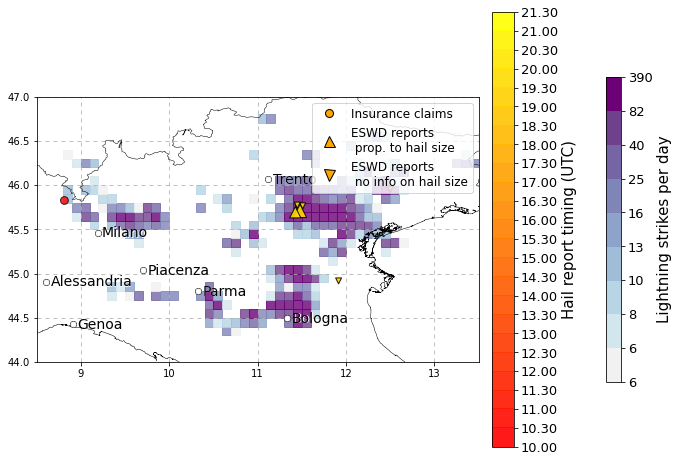

In [57]:
if len(df_lamp_daysum_filt) > 0:
    
    HF.HF_LAMPINET_plot(sf_lamp_10, sf_geo, x_lim, y_lim, df_lamp_daysum_filt, u_ev_sel, eswd_ev_sel, eswd_trange, 
                        clonsel, clatsel, cnamesel, LJ=False, ESWD=True)
    
    pl.savefig(plt_fold + f"Events_Italy_2016-2018/{fold_out}/daily_NLampinet.png", dpi=300, bbox_inches='tight')

#### - OT max probability + EUCLID + ESWD/UNIPOL + LAMPINET daily

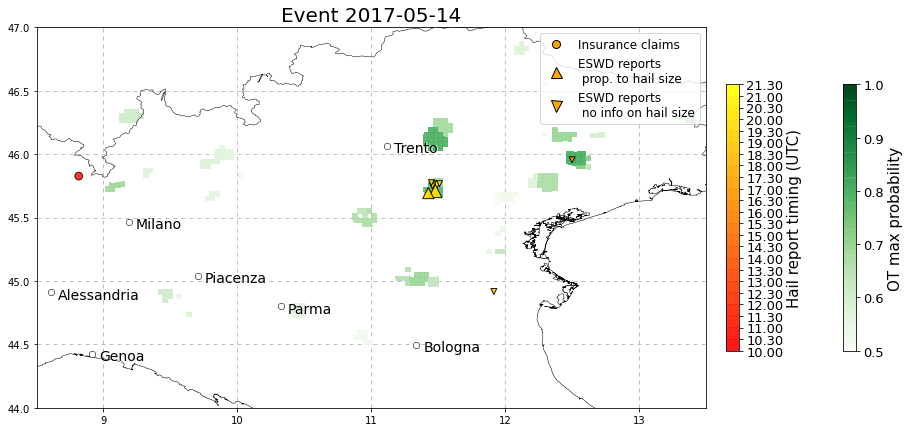

In [62]:
HF.HF_OTmax_plot(ds, sf_lamp_10, sf_geo, x_lim, y_lim, df_lamp_daysum_filt, cpclon, cpclat, otpmax, df_lg_sel, 
                 df_lg_trange, u_ev_sel, eswd_ev_sel, eswd_trange, clonsel, clatsel, cnamesel, 
                 LJ=False, LAMPINET=False, OT=True, EUCLID=False, ESWD=True)

pl.savefig(plt_fold + f"Events_Italy_2016-2018/{fold_out}/{hhmin}-{hhmax}_OTmax.png",dpi=300, bbox_inches='tight')

#### - OT Dtemp:  MINIMUM infrared brightness (cloud top) - tropopause temperature (dtmin) + ESWD/UNIPOL

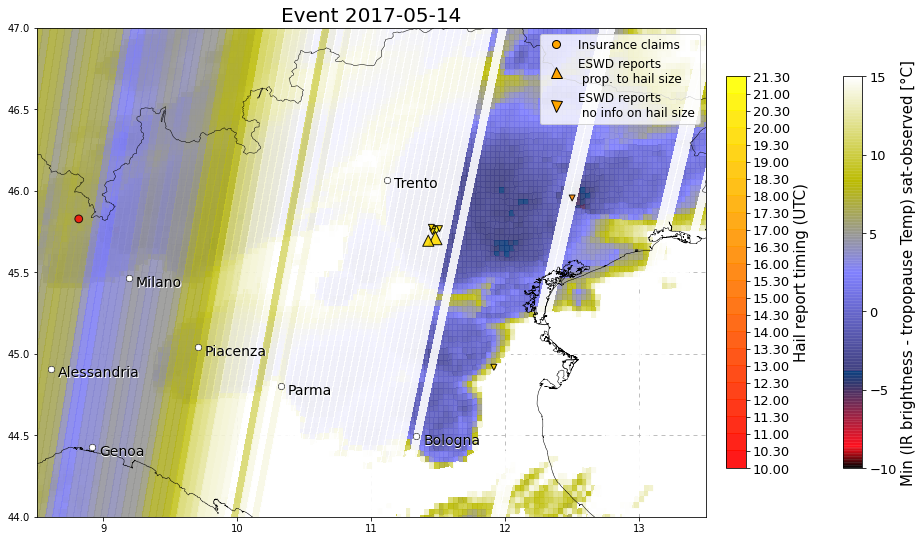

In [63]:
HF.HF_DTmin_plot(ds, sf_geo, x_lim, y_lim, cpclon, cpclat, dtmin, df_lg_sel, df_lg_trange, u_ev_sel, eswd_ev_sel, 
                 eswd_trange, clonsel, clatsel,cnamesel, OT=True, EUCLID=False, ESWD=True)

pl.savefig(plt_fold + f"Events_Italy_2016-2018/{fold_out}/{hhmin}-{hhmax}_OTdTmin.png",dpi=300, bbox_inches='tight')

## - Sub-daily (hourly) analysis

#### - LAMPINET LJ index 

LJ index "documentation" (still qualitative analysis performed, must be redone!):
- 20 km grid
- LJ defined in 15 min interval when there is at least 1 initial strike and >=20 strikes in the next 15 minutes
- Data aggregated hourly: the LJ value is attributed to the last instant of the hour in question (i.e. a LJ issued at 17 means that it covers the minutes 17:00 to 17:59)
- <span style="color:red"> Some red text </span>

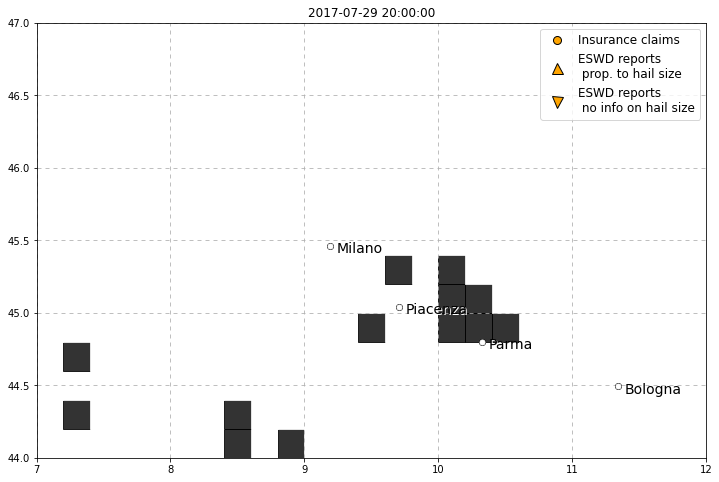

In [26]:
#plot LJ for lj_hour of the day
if len(df_lamp_sel) > 0:
    
    HF.HF_LAMPINET_plot(sf_lamp_20, sf_geo, x_lim, y_lim, df_lamp_sel, u_ev_sel, eswd_ev_sel, eswd_trange, 
                        clonsel, clatsel, cnamesel, LJ=True, ESWD=True)

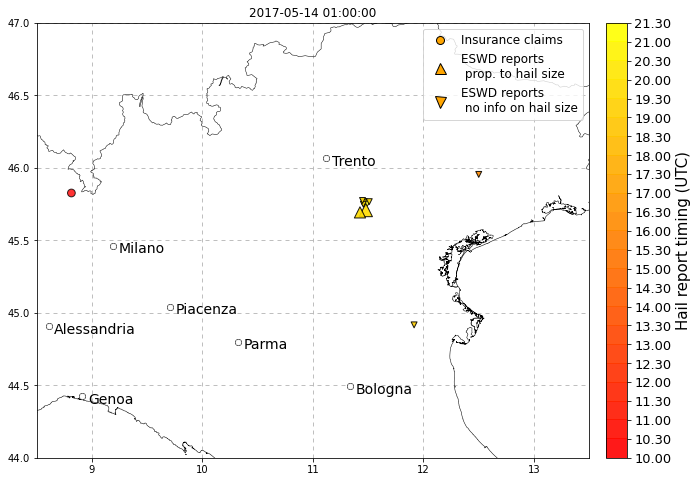

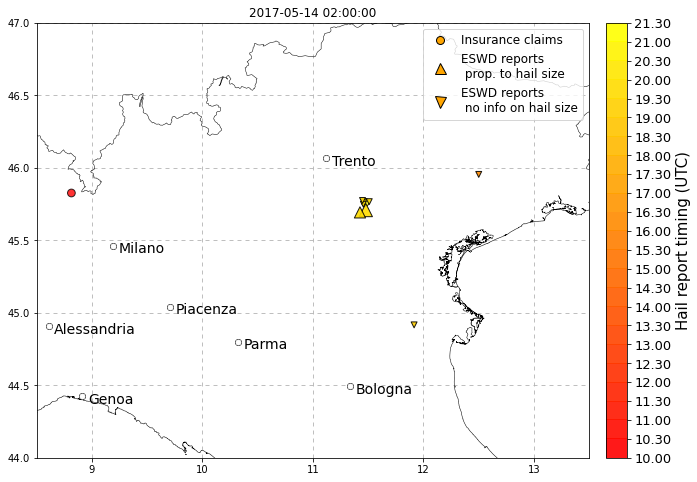

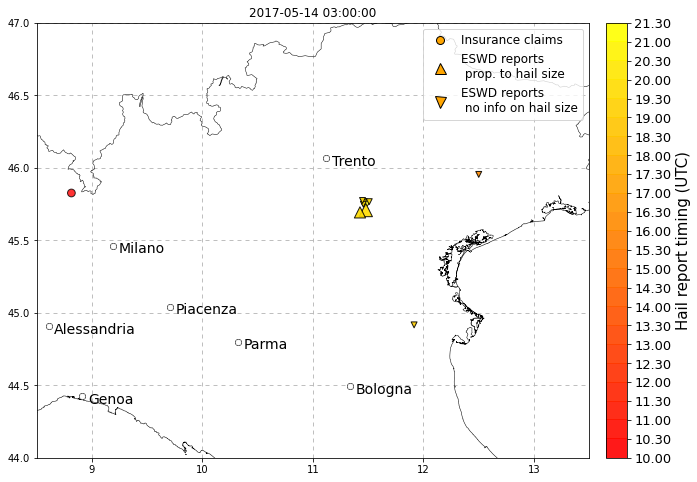

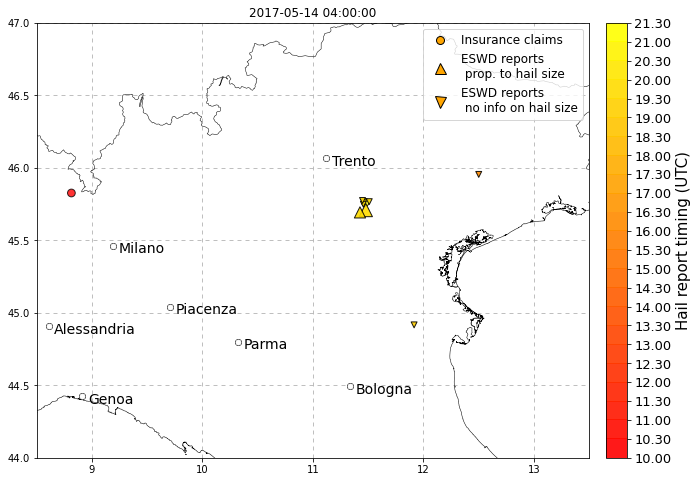

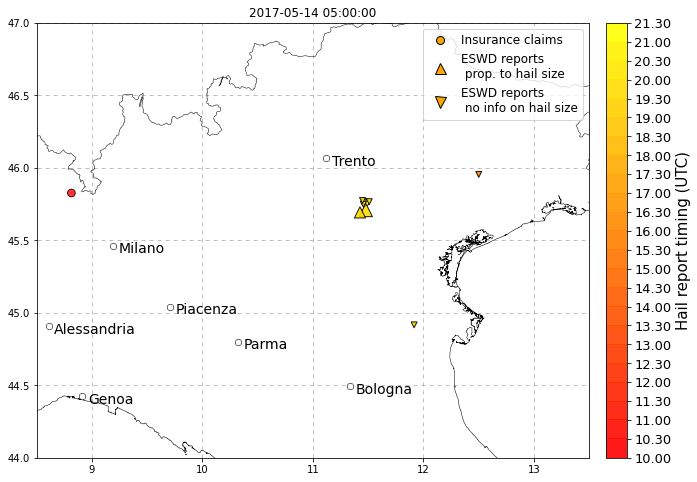

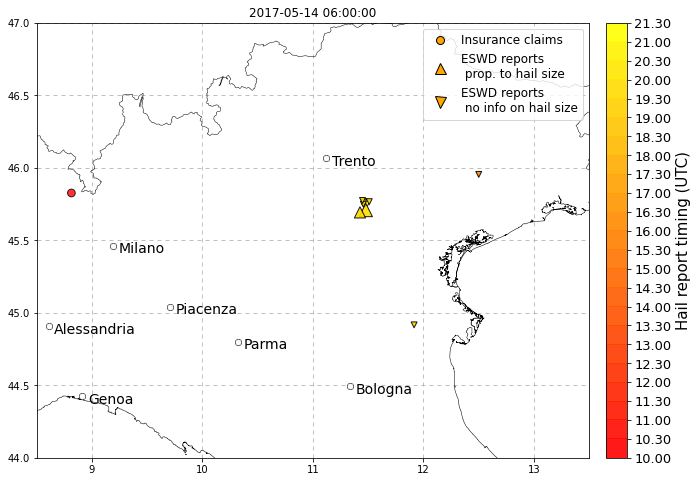

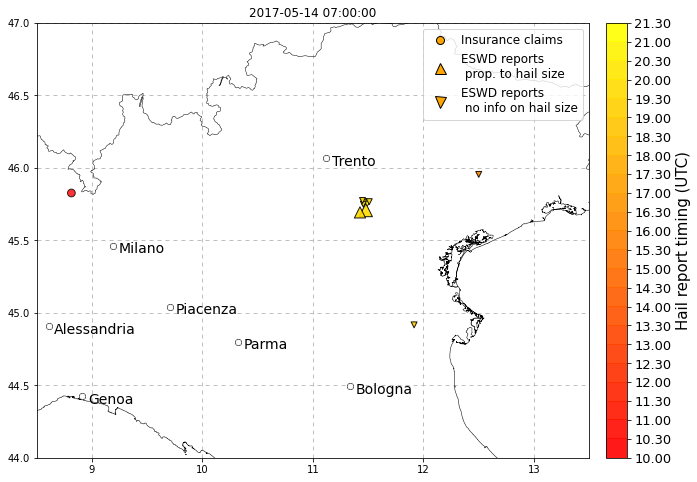

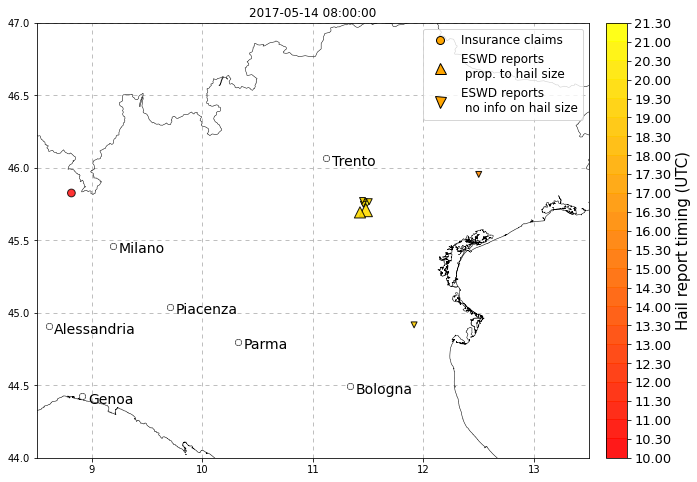

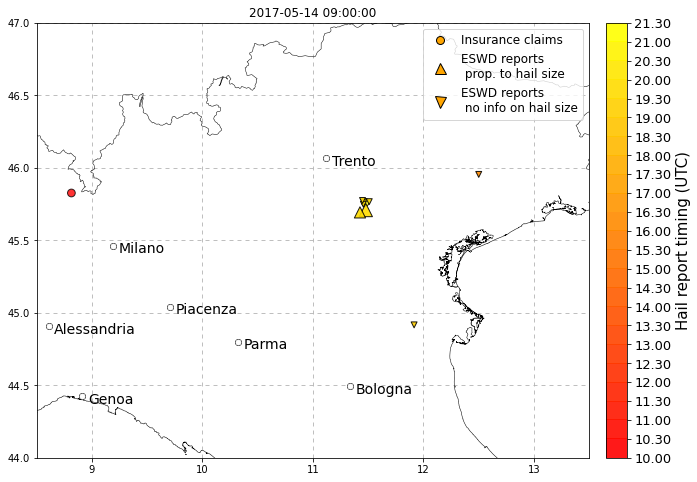

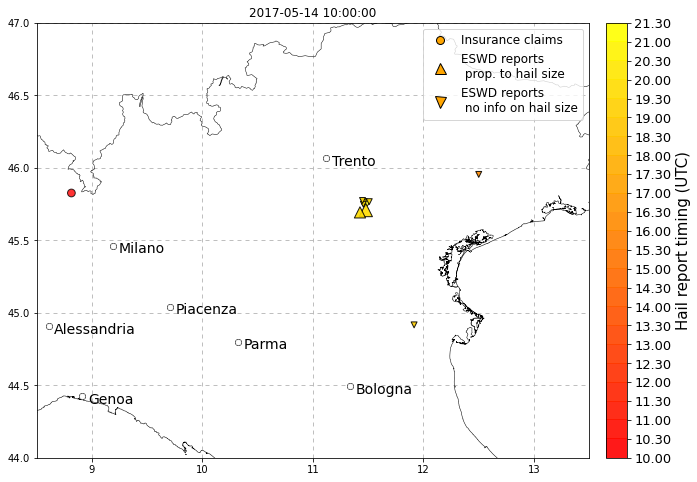

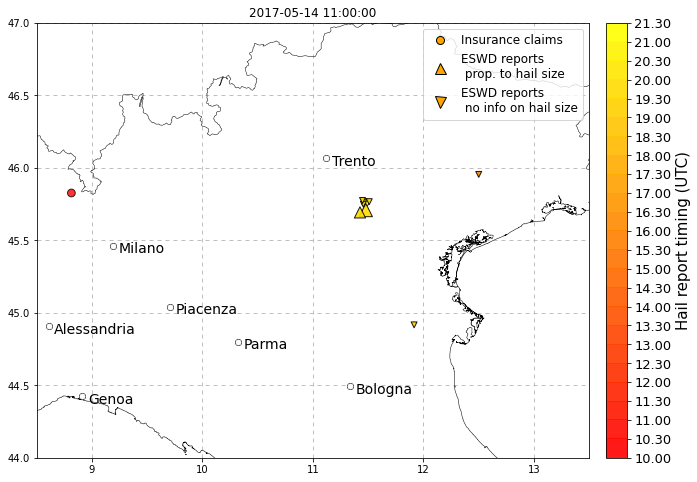

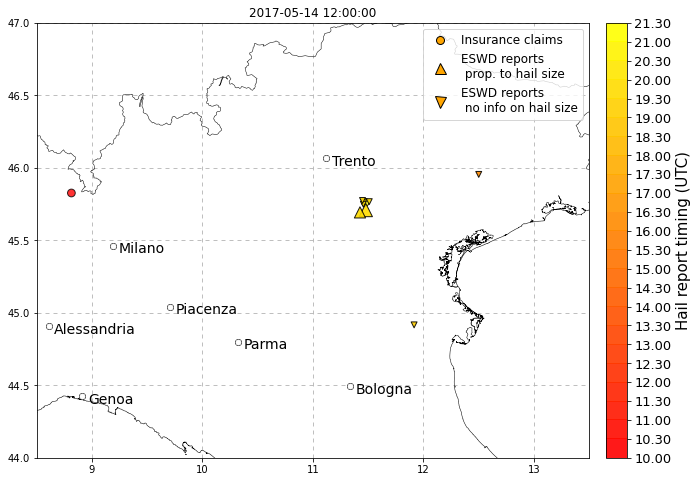

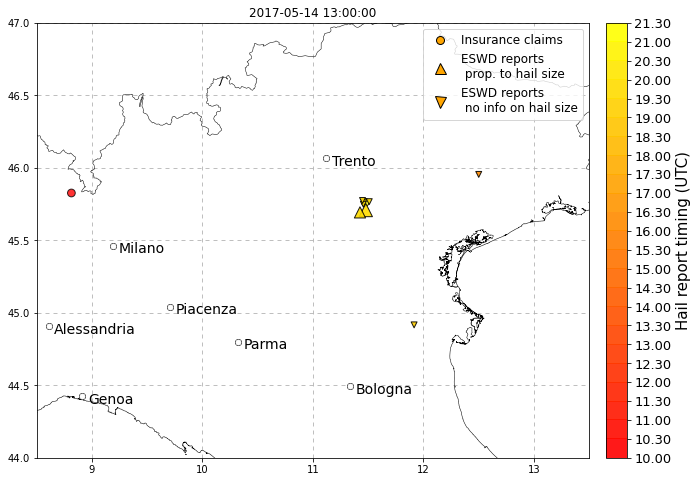

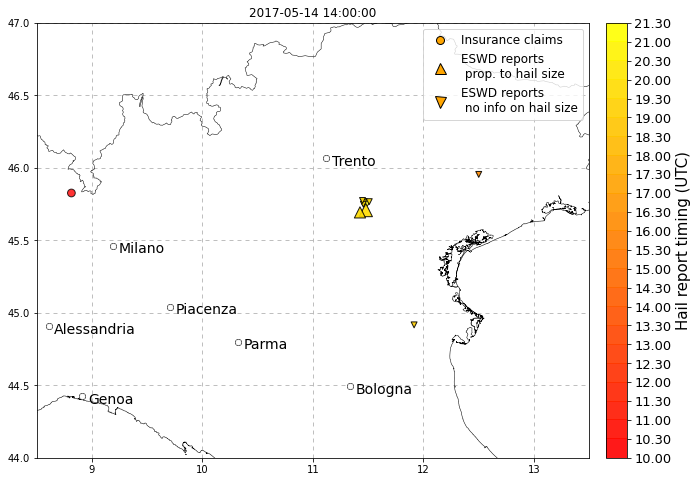

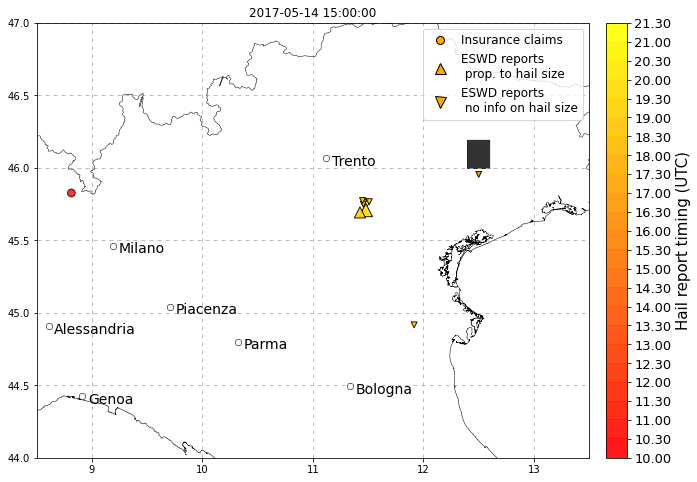

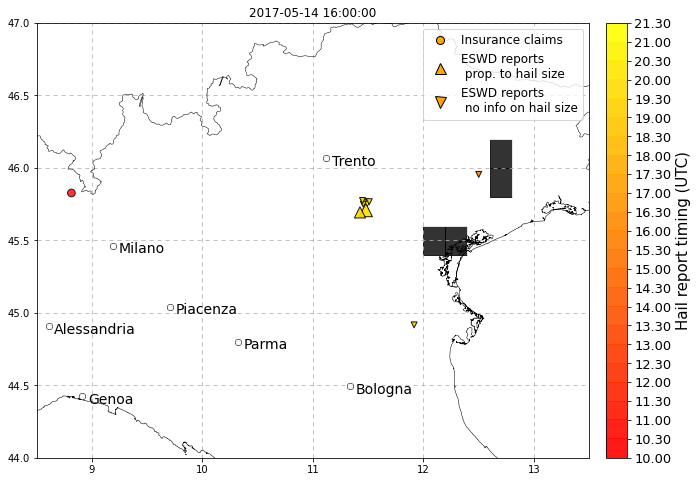

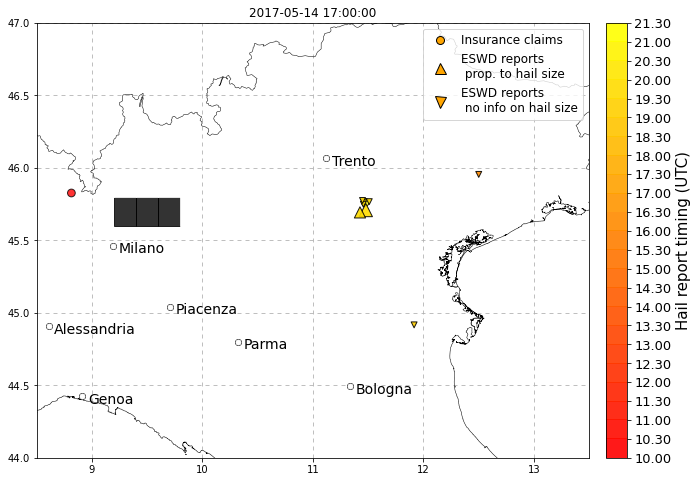

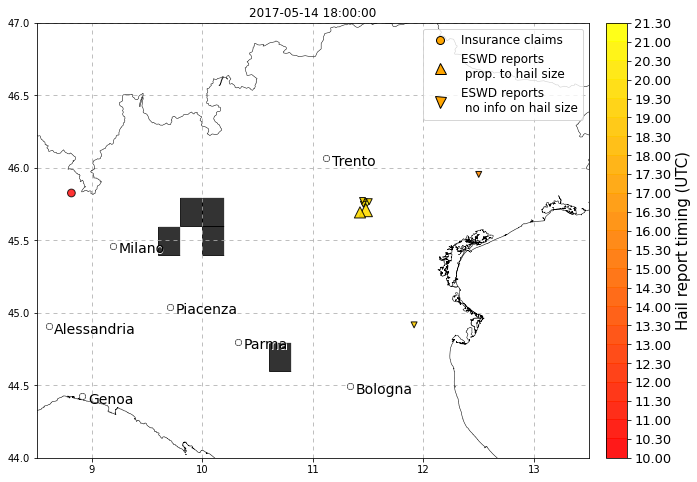

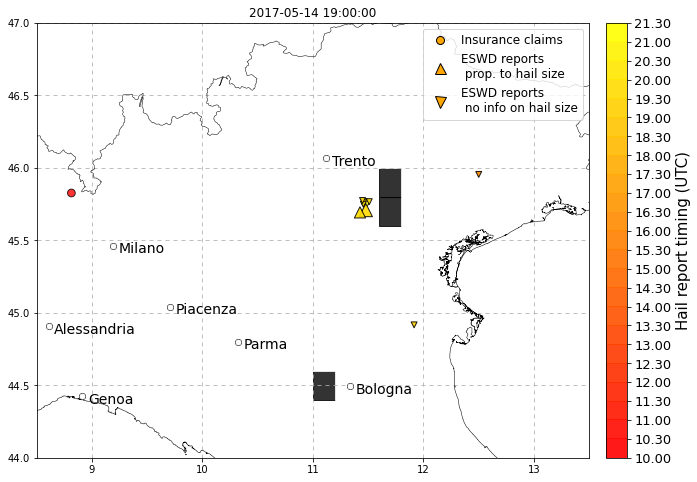

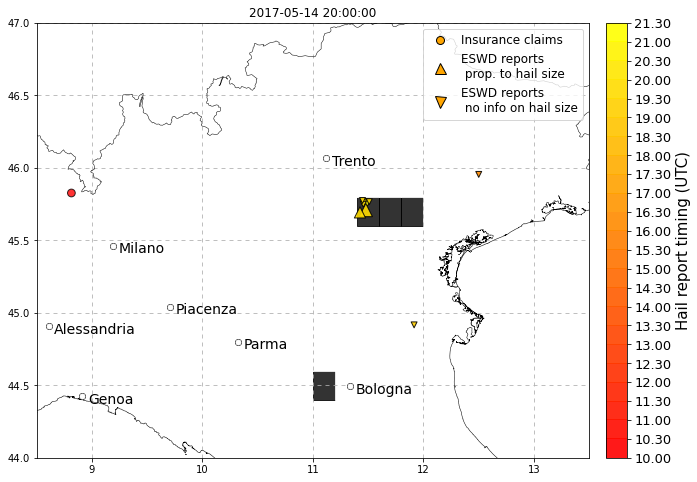

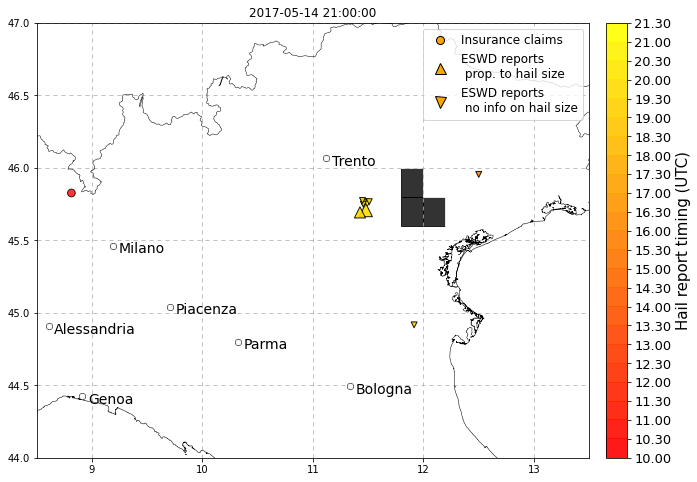

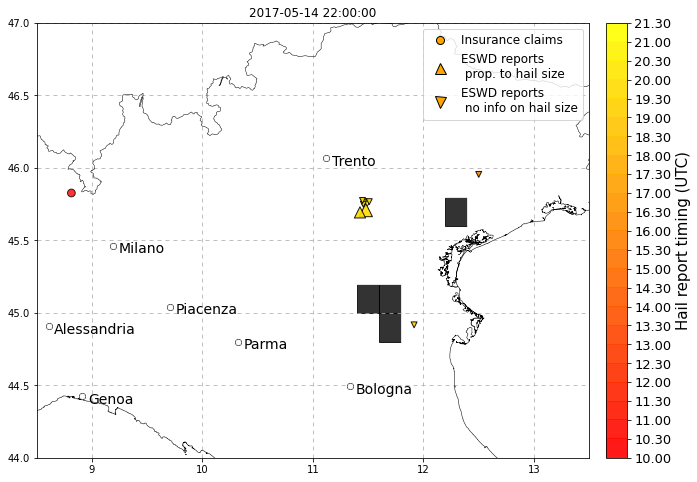

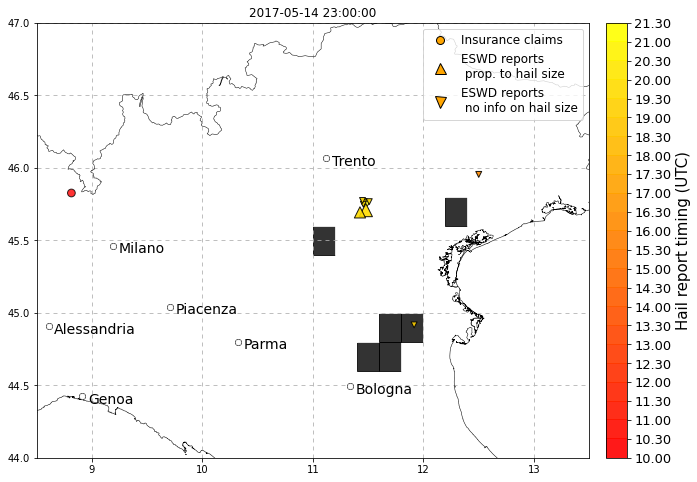

In [64]:
#loop over the hours of the event:
for lj_hour in np.arange(hhmin, hhmax+1, 1):
    
    df_lamp_sel = HF.HF_Lampinet_LJhourly(year_u, mon_u, day_u, lj_hour)
    
    HF.HF_LAMPINET_plot(sf_lamp_20, sf_geo, x_lim, y_lim, df_lamp_sel, u_ev_sel, eswd_ev_sel, eswd_trange, 
                        clonsel, clatsel, cnamesel, LJ=True, ESWD=True)
    
    pl.savefig(plt_fold + f"Events_Italy_2016-2018/{fold_out}/LJ_ind/{lj_hour}_LJ.png",dpi=300,bbox_inches='tight')

#### - SPHERA reanalysis convective proxies

For the moment on a 20km or 10km grid: LI, Kindex, AvvGeop500hPa, %VV700hPa, but will be added DLS, HZEROCL and CAPE

In [65]:
#Read SPHERA data and couple box number to coordinate locations:

#decide sphera box resolution:
sp_res = 10 #20

#set sphera parameter to be plotted:
sp_par = "LI"  #"%VV700" "AvvGeop500" "Kindex" "LI"

#Read the shapefiles:  depending on grid 20km or 10km
if sp_res == 10:
    sf_sp = shp.Reader(fold + "data/lampinet/mask/grid_10_49N.shp", encoding='latin-1'); srn=5;
    
elif sp_res == 20:
    sf_sp = shp.Reader(fold + "data/lampinet/mask/grid_5.shp", encoding='latin-1'); srn=5;


In [66]:
#at the moment: 10km data extends to 49°N (so southern germany included) while 20km data do not (around 48°N)
#every file is related to one HOUR, data for every box every hour 
#         -> tot: (20km grid) 4225 boxes, (10km grid) 16900 boxes  (18150 ??)

# in the read cut out all values > 3..e38 (in common for all parameters in the same box, so probably due to some
#error/missing data in the caluclation of the index in that box) 
if (year_u >= 2016) & (year_u <= 2018):
   
    df_sp = HF.HF_reanProxies_read(year_u, mon_u, day_u, sp_res)

else:
    df_sp = pd.DataFrame()

df_sp

,datetime,box_id,%VV700,AvvGeop500,Kindex,LI
0,2017-05-14 00:00:00,1,5.000000,-42.353542,21.626938,4.700724
1,2017-05-14 00:00:00,2,4.347826,6.390747,21.141554,5.418244
2,2017-05-14 00:00:00,3,0.000000,15.530239,19.158125,4.539444
3,2017-05-14 00:00:00,4,35.000000,-49.409569,19.167572,4.010148
4,2017-05-14 00:00:00,5,20.000000,-4.446294,17.412113,5.379557
...,...,...,...,...,...,...
435595,2017-05-14 23:00:00,18146,66.666664,0.000000,27.660746,1.847598
435596,2017-05-14 23:00:00,18147,25.000000,0.000000,27.862884,1.967186
435597,2017-05-14 23:00:00,18148,33.333332,0.000000,27.943502,2.029564
435598,2017-05-14 23:00:00,18149,33.333332,0.000000,28.027262,2.092390


##### - Plot parameters aggregated over the day: 

In [67]:
#aggregate parameters by avg, min, or max (other could be considered maybe?)
df_sp_dayAvg = df_sp.groupby(['box_id'], as_index=False).mean()
df_sp_dayMax = df_sp.groupby(['box_id'], as_index=False).max().drop(columns=['datetime'])
df_sp_dayMin = df_sp.groupby(['box_id'], as_index=False).min().drop(columns=['datetime'])

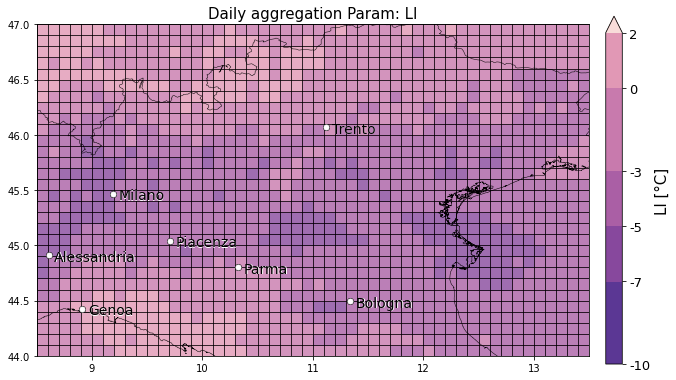

In [68]:
#MINIMUM of LI
sp_par = 'LI'
sp_hour = 0
HF.HF_reanProxies_plot(sf_geo, sf_sp, x_lim, y_lim, df_sp_dayMin, sp_hour, sp_par, clonsel, clatsel, cnamesel, 
                       hourly=False)

pl.savefig(plt_fold + f"Events_Italy_2016-2018/{fold_out}/DailyMIN_{sp_par}_{sp_res}km.png",dpi=300,
           bbox_inches='tight')

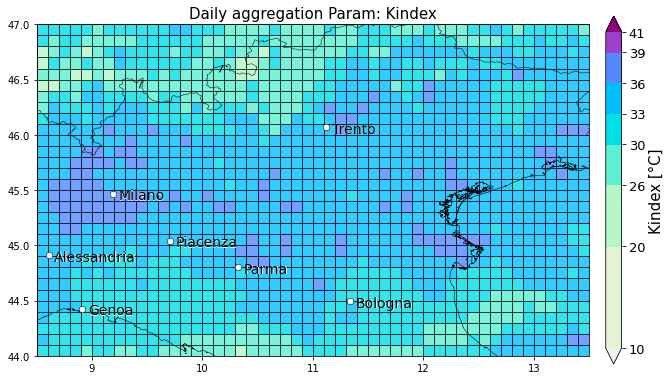

In [69]:
#MAXIMUM of Kindex
sp_par = 'Kindex'
sp_hour = 0
HF.HF_reanProxies_plot(sf_geo, sf_sp, x_lim, y_lim, df_sp_dayMax, sp_hour, sp_par, clonsel, clatsel, cnamesel, 
                       hourly=False)

pl.savefig(plt_fold + f"Events_Italy_2016-2018/{fold_out}/DailyMIN_{sp_par}_{sp_res}km.png",dpi=300,
           bbox_inches='tight')

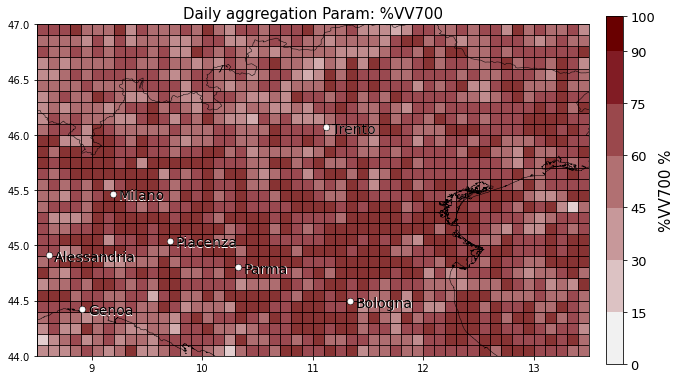

In [70]:
#MAXIMUM of %VV700
sp_par = '%VV700'
sp_hour = 0
HF.HF_reanProxies_plot(sf_geo, sf_sp, x_lim, y_lim, df_sp_dayMax, sp_hour, sp_par, clonsel, clatsel, cnamesel, 
                       hourly=False)

pl.savefig(plt_fold + f"Events_Italy_2016-2018/{fold_out}/DailyMIN_{sp_par}_{sp_res}km.png",dpi=300,
           bbox_inches='tight')

##### - Plot parameters on a hourly basis: 

In [ ]:
#plot SPHERA parameter for selected hours of the day: >= hhmin and <=hhmax

for sp_hour in np.arange(hhmin, hhmax+1, 1):
    
    HF.HF_reanProxies_plot(sf_geo, sf_sp, x_lim, y_lim, df_sp, sp_hour, sp_par, clonsel, clatsel, cnamesel)
    
    #pl.savefig(f"/home/ws/bg2896/bin/notebooks/HailEvents/plots/Bohringen_18-08-2017/sphera_proxies/event_Bohringen_{sp_hour}_{sp_par}_{sp_res}km.png", 
    #       dpi=300, bbox_inches='tight')

In [ ]:
sp_hour = 13

HF.HF_reanProxies_plot(sf_geo, sf_sp, x_lim, y_lim, df_sp, sp_hour, sp_par, clonsel, clatsel, cnamesel)

<span style="color:red"> MUST FINISH WITH AvvGeop500!</span>

<span style="color:red"> MUST SOLVE the problem of re-uploading the external module when i modify some functions WITHOUT needing to restart the kernel (even multiple times!!!)</span>